# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import os
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total = len(cities)
total

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
query_url = "http://api.openweathermap.org/data/2.5/weather?q="
city_num = 0
api_data = open('output_data/cities.csv', 'w')
csvwriter = csv.writer(api_data)
header = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
csvwriter.writerow(header)

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
for city in cities:
    response = requests.get(query_url + city + "&units=imperial" + "&APPID=" + api_key).json()
    city_num += 1
    try:
        csvwriter.writerow([response['name'], response['clouds']['all'], response['sys']['country'],
                    response['dt'], response['main']['humidity'], response['coord']['lat'],
                    response['coord']['lon'], response['main']['temp_max'],
                    response['wind']['speed']])
        print(f"Processing Record {city_num} of {total} | {city}")
    except:
        print(f"City not found. Skipping...")
        continue
api_data.close()
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 589 | gedo
Processing Record 2 of 589 | grindavik
Processing Record 3 of 589 | hobart
Processing Record 4 of 589 | ushuaia
Processing Record 5 of 589 | mendi
Processing Record 6 of 589 | haines junction
Processing Record 7 of 589 | aketi
Processing Record 8 of 589 | anito
Processing Record 9 of 589 | saint-georges
Processing Record 10 of 589 | puerto ayora
Processing Record 11 of 589 | rikitea
City not found. Skipping...
Processing Record 13 of 589 | punta arenas
City not found. Skipping...
Processing Record 15 of 589 | marathon
Processing Record 16 of 589 | qaanaaq
Processing Record 17 of 589 | palana
Processing Record 18 of 589 | mataura
City not found. Skipping...
Processing Record 20 of 589 | egvekinot
Processing Record 21 of 589 | bilibino
City not found. Skipping...
Processing Record 23 of 589 | meulaboh
Processing Record 24 of 589 | cape town
Processing Record 25 of 589 | ribeira grande
Processing Reco

Processing Record 212 of 589 | bubaque
Processing Record 213 of 589 | vanderhoof
Processing Record 214 of 589 | clyde river
Processing Record 215 of 589 | hamilton
Processing Record 216 of 589 | nishihara
Processing Record 217 of 589 | timbiqui
City not found. Skipping...
Processing Record 219 of 589 | shagonar
Processing Record 220 of 589 | tuatapere
Processing Record 221 of 589 | nagato
Processing Record 222 of 589 | mzimba
Processing Record 223 of 589 | amahai
Processing Record 224 of 589 | iranshahr
Processing Record 225 of 589 | pangai
Processing Record 226 of 589 | villa maria
Processing Record 227 of 589 | szczecinek
Processing Record 228 of 589 | horta
Processing Record 229 of 589 | east wemyss
Processing Record 230 of 589 | bonthe
Processing Record 231 of 589 | chabahar
Processing Record 232 of 589 | kathmandu
Processing Record 233 of 589 | treznea
Processing Record 234 of 589 | flinders
Processing Record 235 of 589 | los llanos de aridane
Processing Record 236 of 589 | anori


Processing Record 423 of 589 | dezhou
Processing Record 424 of 589 | conway
Processing Record 425 of 589 | sayyan
Processing Record 426 of 589 | marystown
Processing Record 427 of 589 | sitka
Processing Record 428 of 589 | okhotsk
Processing Record 429 of 589 | kieta
City not found. Skipping...
Processing Record 431 of 589 | salinopolis
Processing Record 432 of 589 | mangai
City not found. Skipping...
Processing Record 434 of 589 | kalmunai
Processing Record 435 of 589 | gramado
Processing Record 436 of 589 | mersing
Processing Record 437 of 589 | vila franca do campo
Processing Record 438 of 589 | sabang
Processing Record 439 of 589 | eten
Processing Record 440 of 589 | kaseda
Processing Record 441 of 589 | vagur
Processing Record 442 of 589 | batagay-alyta
Processing Record 443 of 589 | safranbolu
Processing Record 444 of 589 | nyurba
Processing Record 445 of 589 | kintampo
Processing Record 446 of 589 | rawson
City not found. Skipping...
Processing Record 448 of 589 | nenjiang
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.read_csv('output_data/cities.csv')
city_df.count()

City          529
Cloudiness    529
Country       526
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [15]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gedo,80,ET,1553825536,95,9.01,37.45,53.40,3.15
1,Grindavik,75,IS,1553824783,100,63.84,-22.43,32.00,31.09
2,Hobart,0,AU,1553825295,27,-42.88,147.33,78.80,18.34
3,Ushuaia,40,AR,1553821200,47,-54.81,-68.31,57.20,10.29
4,Mendi,24,ET,1553825537,94,9.80,35.10,55.83,4.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

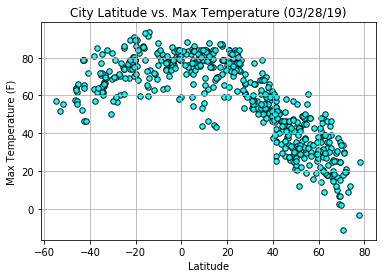

In [11]:
city_df.plot(kind='scatter', x='Lat', y='Max Temp', alpha=0.9, color='cyan', edgecolors='black', s=30)
plt.title('City Latitude vs. Max Temperature (03/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/lat_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

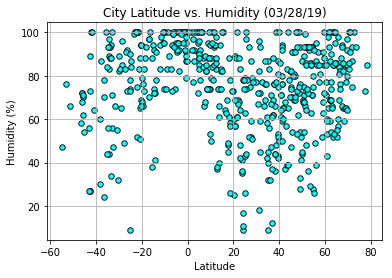

In [12]:
city_df.plot(kind='scatter', x='Lat', y='Humidity', alpha=0.9, color='cyan', edgecolors='black', s=30)
plt.title('City Latitude vs. Humidity (03/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('output_data/lat_hum.png')
plt.show()

#### Latitude vs. Cloudiness Plot

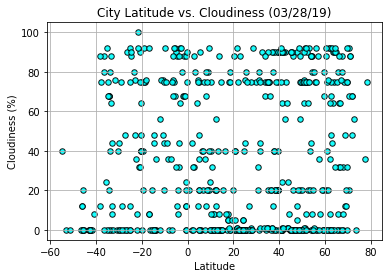

In [13]:
city_df.plot(kind='scatter', x='Lat', y='Cloudiness', alpha=0.9, color='cyan', edgecolors='black', s=30)
plt.title('City Latitude vs. Cloudiness (03/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/lat_cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

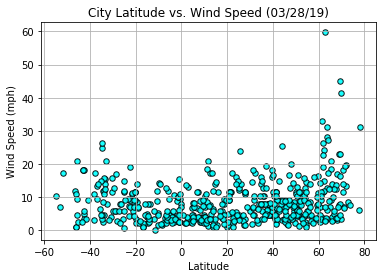

In [14]:
city_df.plot(kind='scatter', x='Lat', y='Wind Speed', alpha=0.9, color='cyan', edgecolors='black', s=30)
plt.title('City Latitude vs. Wind Speed (03/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/lat_wind.png')
plt.show()

In [ ]:
#Three final observations
#1 There is a correlation between latitude and temperature, as expected. The northern hemisphere appears to be colder
#  than the southern hemisphere as cities near the poles.
#2 There is no strong correlation between latitude and wind speed. It is interesting that there are a few extreme 
#  outliers in the northern hemisphere for wind speed, including one value that is 10-15 mph higher than the next
#  ranked city. These extreme instances of weather may be attributed to global warming.
#3 There is no strong correlation between latitude and humidity. However, it seems that at latitude 0 (equator), there
#  are no cities with humidity below 60%. This might be due to the fact that many cities along the equator are near
#  large bodies of water.